<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/WTA_1st_weeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Source of Data
# Jeff Sackmann data at https://www.jeffsackmann.com/

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Combine data from years 2000-2019
url = 'https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/'
df_list = [pd.read_csv(url + 'wta_matches_' + str(year) + '.csv') for year in range(2000,2020)]

type(df_list)

list

In [3]:
# Player rankings from 2000-2019

rankings_10s = pd.read_csv(url + 'wta_rankings_10s.csv')
rankings_10s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings_00s = pd.read_csv(url + 'wta_rankings_00s.csv')
rankings_00s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings = pd.concat([rankings_00s, rankings_10s])

rankings.index = range(rankings.shape[0])

rankings

,week,ranking,player_id,ranking_points,tours
0,20000101,1,200001,6074.0,NaN
1,20000103,1,200001,6074.0,NaN
2,20000110,1,200001,6074.0,NaN
3,20000117,1,200001,6003.0,NaN
4,20000124,1,200001,6003.0,NaN
...,...,...,...,...,...
1207230,20141110,1242,223123,3.0,NaN
1207231,20191209,1047,223179,NaN,NaN
1207232,20191216,996,223179,NaN,NaN
1207233,20191223,948,223179,NaN,NaN


In [4]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207235 entries, 0 to 1207234
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   week            1207235 non-null  int64  
 1   ranking         1207235 non-null  int64  
 2   player_id       1207235 non-null  int64  
 3   ranking_points  1207231 non-null  float64
 4   tours           618226 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 46.1 MB


In [5]:
type(rankings['week'])

pandas.core.series.Series

In [6]:
# Convert ranking dates to datetime
rankings['week'] = pd.to_datetime(rankings['week'], format = '%Y%m%d')

In [7]:
player_df = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_players.csv')
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60027 entries, 0 to 60026
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    60027 non-null  int64  
 1   name_first   56704 non-null  object 
 2   name_last    60027 non-null  object 
 3   hand         60024 non-null  object 
 4   dob          25213 non-null  float64
 5   ioc          59034 non-null  object 
 6   height       1338 non-null   float64
 7   wikidata_id  3707 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


In [8]:
joined_df = pd.merge(rankings, player_df, on = 'player_id', how = 'left')

In [9]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207235 entries, 0 to 1207234
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   week            1207235 non-null  datetime64[ns]
 1   ranking         1207235 non-null  int64         
 2   player_id       1207235 non-null  int64         
 3   ranking_points  1207231 non-null  float64       
 4   tours           618226 non-null   float64       
 5   name_first      1207235 non-null  object        
 6   name_last       1207235 non-null  object        
 7   hand            1207235 non-null  object        
 8   dob             1207235 non-null  float64       
 9   ioc             1207235 non-null  object        
 10  height          444146 non-null   float64       
 11  wikidata_id     706520 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 119.7+ MB


In [10]:
joined_df.head(100)

,week,ranking,player_id,ranking_points,tours,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,2000-01-01,1,200001,6074.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
1,2000-01-03,1,200001,6074.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
2,2000-01-10,1,200001,6074.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
3,2000-01-17,1,200001,6003.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
4,2000-01-24,1,200001,6003.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2001-10-22,2,200001,4842.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
96,2001-10-29,3,200001,4586.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
97,2001-11-05,4,200001,3944.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720
98,2001-11-12,4,200001,3944.0,NaN,Martina,Hingis,R,19800930.0,SUI,170.0,Q134720


In [11]:
keep_column=['ranking', 'player_id', 'name_first', 'name_last']
df2=joined_df[keep_column]
df2


,ranking,player_id,name_first,name_last
0,1,200001,Martina,Hingis
1,1,200001,Martina,Hingis
2,1,200001,Martina,Hingis
3,1,200001,Martina,Hingis
4,1,200001,Martina,Hingis
...,...,...,...,...
1207230,1242,223123,Jia Xiang,Lu
1207231,1047,223179,Marion,Viertler
1207232,996,223179,Marion,Viertler
1207233,948,223179,Marion,Viertler


In [12]:
df3=df2.loc[(df2['ranking'] ==1)]
df3

,ranking,player_id,name_first,name_last
0,1,200001,Martina,Hingis
1,1,200001,Martina,Hingis
2,1,200001,Martina,Hingis
3,1,200001,Martina,Hingis
4,1,200001,Martina,Hingis
...,...,...,...,...
1199804,1,202458,Ashleigh,Barty
1201123,1,202458,Ashleigh,Barty
1202444,1,202458,Ashleigh,Barty
1203765,1,202458,Ashleigh,Barty


In [15]:
checktosee = df3.groupby(['ranking', 'name_last', 'name_first']).count()
checktosee

player_id
ranking name_last name_first           
1       Azarenka  Victoria           52
        Barty     Ashleigh           22
        Capriati  Jennifer           17
        Clijsters Kim                20
        Davenport Lindsay            79
        Halep     Simona             52
        Henin     Justine           118
        Hingis    Martina            88
        Ivanovic  Ana                12
        Jankovic  Jelena             19
        Kerber    Angelique          32
        Mauresmo  Amelie             39
        Muguruza  Garbine             4
        Osaka     Naomi              21
        Pliskova  Karolina            7
        Safina    Dinara             26
        Sharapova Maria              21
        Williams  Serena            318
                  Venus              11
        Wozniacki Caroline           73

In [16]:
checktosee.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, (1, 'Azarenka', 'Victoria') to (1, 'Wozniacki', 'Caroline')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   player_id  20 non-null     int64
dtypes: int64(1)
memory usage: 713.0+ bytes


In [17]:
checktosee.index

MultiIndex([(1,  'Azarenka',  'Victoria'),
            (1,     'Barty',  'Ashleigh'),
            (1,  'Capriati',  'Jennifer'),
            (1, 'Clijsters',       'Kim'),
            (1, 'Davenport',   'Lindsay'),
            (1,     'Halep',    'Simona'),
            (1,     'Henin',   'Justine'),
            (1,    'Hingis',   'Martina'),
            (1,  'Ivanovic',       'Ana'),
            (1,  'Jankovic',    'Jelena'),
            (1,    'Kerber', 'Angelique'),
            (1,  'Mauresmo',    'Amelie'),
            (1,  'Muguruza',   'Garbine'),
            (1,     'Osaka',     'Naomi'),
            (1,  'Pliskova',  'Karolina'),
            (1,    'Safina',    'Dinara'),
            (1, 'Sharapova',     'Maria'),
            (1,  'Williams',    'Serena'),
            (1,  'Williams',     'Venus'),
            (1, 'Wozniacki',  'Caroline')],
           names=['ranking', 'name_last', 'name_first'])

In [18]:
checktosee.reset_index(inplace=True)

In [19]:
checktosee

,ranking,name_last,name_first,player_id
0,1,Azarenka,Victoria,52
1,1,Barty,Ashleigh,22
2,1,Capriati,Jennifer,17
3,1,Clijsters,Kim,20
4,1,Davenport,Lindsay,79
5,1,Halep,Simona,52
6,1,Henin,Justine,118
7,1,Hingis,Martina,88
8,1,Ivanovic,Ana,12
9,1,Jankovic,Jelena,19


In [20]:
checktosee['full_name'] = checktosee['name_first'] + ' ' + checktosee['name_last']

In [21]:
checktosee2 = checktosee.sort_values(by="player_id", ascending=False )

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


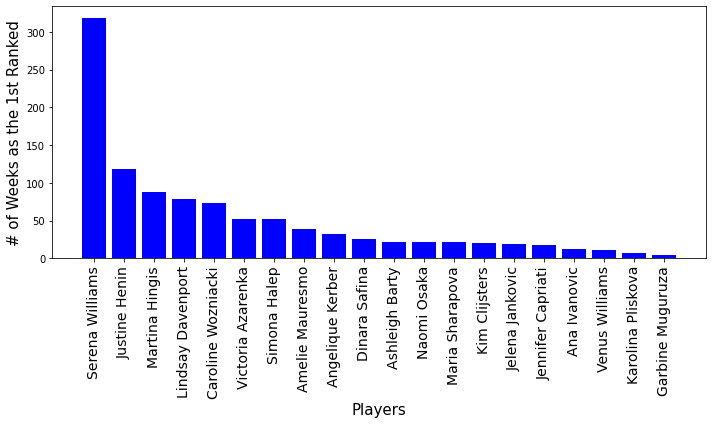

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(checktosee2["full_name"], checktosee2["player_id"], color ='blue',
        width = 0.8)

plt.ylabel("# of Weeks as the 1st Ranked", size=15)
plt.xlabel("Players", size=15) 
plt.xticks(rotation = 90, size=14)
plt.tight_layout()

#ax.set_ylabel(player_id"])

plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/tennis/Tennis_Predicting-master/womenfirst.png', dpi=500, bbox_inches='tight')


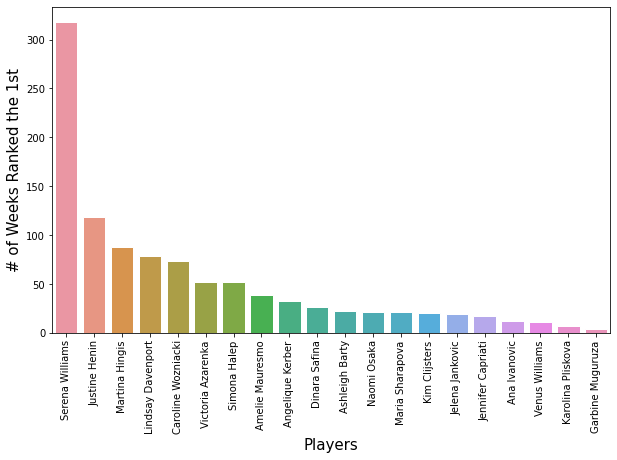

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
#sns.set_palette()
plt.ylabel("# of Weeks as the 1st Ranked", size=15)
plt.xlabel("Players", size=15) 

ax=sns.barplot(x='full_name', y='player_id', data=checktosee2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Players', ylabel='# of Weeks Ranked the 1st')


plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/tennis/Tennis_Predicting-master/womenfirst_sns.png', dpi=500, bbox_inches='tight')
